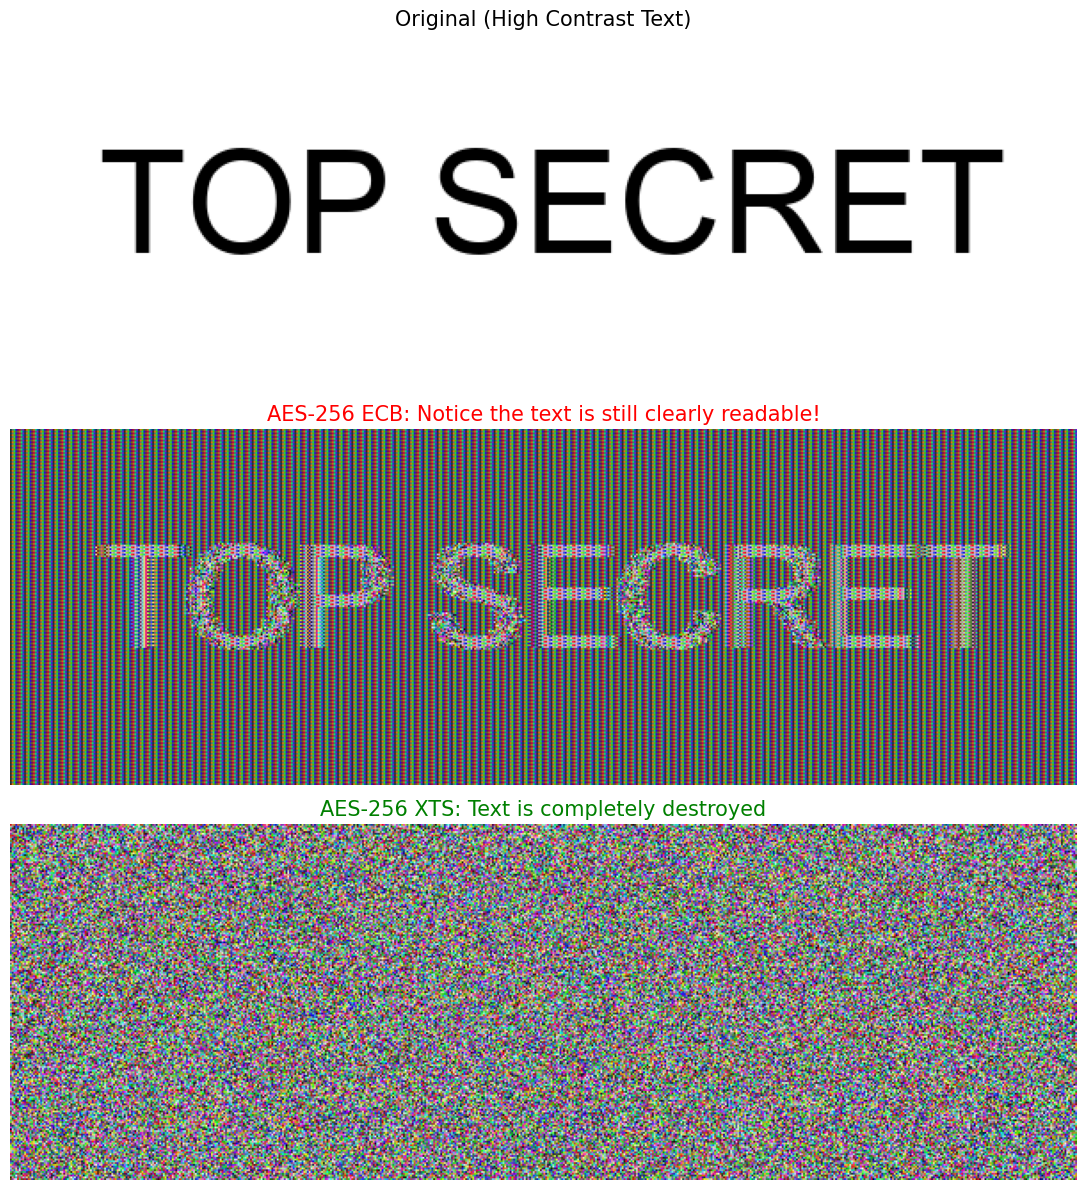

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

def demo():
    # 1. Create a larger image for clear text
    width, height = 600, 200
    img = Image.new('RGB', (width, height), color='white')
    d = ImageDraw.Draw(img)
    
    # 2. Load a large font (Attempts to find a system font)
    try:
        # For Linux/Rocky/Ubuntu: /usr/share/fonts
        # For Mac: /Library/Fonts/Arial.ttf
        font = ImageFont.truetype("Arial.ttf", 80)
    except:
        # Fallback if specific font is missing
        font = ImageFont.load_default()
        print("System font not found, using default (small).")

    # Draw the text in the center
    d.text((50, 50), "TOP SECRET", fill=(0, 0, 0), font=font)
    
    # 3. AES-256 Setup
    data = img.tobytes()
    pad_len = 16 - (len(data) % 16)
    padded_data = data + (b'\x00' * pad_len)
    
    key_ecb = os.urandom(32)    # 256-bit
    key_xts = os.urandom(64)    # 512-bit total for XTS
    tweak = os.urandom(16)

    # --- ECB Encryption ---
    ct_ecb = Cipher(algorithms.AES(key_ecb), modes.ECB()).encryptor().update(padded_data)
    img_ecb = Image.frombytes("RGB", img.size, ct_ecb[:len(data)])

    # --- XTS Encryption ---
    ct_xts = Cipher(algorithms.AES(key_xts), modes.XTS(tweak)).encryptor().update(padded_data)
    img_xts = Image.frombytes("RGB", img.size, ct_xts[:len(data)])

    # --- Comparison Plot ---
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    axes[0].imshow(img); axes[0].set_title("Original (High Contrast Text)", fontsize=15)
    axes[1].imshow(img_ecb); axes[1].set_title("AES-256 ECB: Notice the text is still clearly readable!", color='red', fontsize=15)
    axes[2].imshow(img_xts); axes[2].set_title("AES-256 XTS: Text is completely destroyed", color='green', fontsize=15)
    
    for ax in axes:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

demo()